# Markov chains

[Markov chains](https://en.wikipedia.org/wiki/Markov_chain) are systems that evolve in discrete time. The system might have a state that evolves in time and represents the number of particles in a region of space or the probability of a given letter in a language. They are usually described by a state-transition diagram like,

![state-transition diagram](https://upload.wikimedia.org/wikipedia/commons/thumb/2/2b/Markovkate_01.svg/440px-Markovkate_01.svg.png)

which can be described in a matrix like,

$$
T = \left(\begin{matrix}
0.3 & 0.4 \\
0.7 & 0.6
\end{matrix}\right)
$$

We then represent the state of the system like,
$$
x = \left(\begin{matrix}
\text{Quantity in E} \\
\text{Quantity in A}
\end{matrix}\right)
$$

At each time step, we evolve the state by multiplying $ x_{t+1} = T x_t $.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from functools import reduce

**Problem:** For the above transition matrix, evolve the matrix according to the above rule and plot the state versus time.

[[1.   0.3  0.37]
 [0.   0.7  0.63]]
[[1. 0.]]


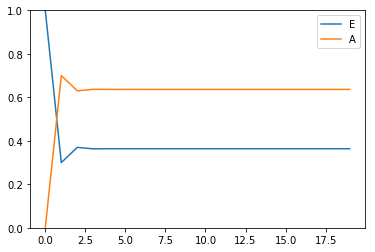

In [38]:
T = np.array([[0.3, 0.4],
              [0.7, 0.6]])

x0 = np.array([1.0, 0.0]).reshape(-1, 1)

# First, second, and third time step evolutions for example,
print(np.hstack([x0, T.dot(x0), T.dot(T.dot(x0))]))

def state_occupation(x0, T, steps):
    # This following line is rather involved Python
    # Just replace it, but you can assume that the line is correct
    # to compare results
    """
    Next top (amount into E) = (1, 1) * top + (1, 2) * bottom
    Next bottom = (2, 1) * top + (2, 2) * bottom 
    """
    states = []
    for i in range(steps):
        states.append(x0)
        x0 = T.dot(x0)
        # Use steps to obtain numbers, (steps, 0) for top and (steps, 1) for bottom
        """
        top = (T[0, 0] * x0[steps, 0] + T[0, 1] * x0[steps, 1])
        bottom = (T[1, 0] * x0[steps - 1, 0] + T[1, 1] * x0[steps - 1, 1])
        """
    return np.hstack(states).T

print(np.array(sum((list(reduce(np.dot, [x0.T] + [T.T]*i)) for i in range(1)), [])))
x = state_occupation(x0, T, 20)

plt.plot(x[:, 0])
plt.plot(x[:, 1])
plt.legend(['E', 'A'])
plt.ylim([0, 1])
plt.show()

**Problem:** At each timestep, find the most likely state. Meaning if E has more occupation than A, then E is more likely.

In [48]:
def most_likely(x0, T, steps, states=['E', 'A']):
    # Replace the line with your own code
    probables = []
    for value in np.argmax(state_occupation(x0, T, steps), axis=1):
        probables.append(states[value])
    print(probables)
    return probables
    print([states[i] for i in np.argmax(state_occupation(x0, T, steps), axis=1)])

most_likely(x0, T, 10)

['E', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A']


['E', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A']

The output list should agree with the plot from the previous problem

## Language Modeling

Markov chains can be useful for generating fake words that mimic structures in the language. Let's look at a sample of text from [English](https://en.wikipedia.org/wiki/Donald_Trump),

In [49]:
import requests, re
en = requests.get('http://www.gutenberg.org/files/74/74-0.txt').text.lower()
en = re.sub('[^a-z]+', ' ', en) # Remove all non-alphabet characters
print(len(en)/255)

1545.043137254902


We can train a Markov chain simply by computing the transition probabilities between letters. Note that I add a 1.0e-3 to the initial matrix. This is called [Additive smoothing](https://en.wikipedia.org/wiki/Additive_smoothing) and although not needed, makes my life easier by avoiding dividing by zero.

In [50]:
T_en = np.zeros((255, 255))

for c0, c1 in zip(en[:-1], en[1:]):
    if ord(c0) < 256 and ord(c1) < 256:
        T_en[ord(c1), ord(c0)] += 1.0

print(np.sum(T_en))
T_en /= np.sum(T_en, axis=1).reshape(-1, 1) + 1e-3

393985.0


I can generate a simple word by using the most likely function above,

In [51]:
for starting_letter in 'asdfghjklqwertyuiop':
    x0 = np.eye(255)[ord(starting_letter)].reshape(-1, 1)
    states = list(map(chr, range(255)))
    print(''.join(most_likely(x0, T_en, 50, states)))

['a', 'n', 'g', 'w', 'e', 'n', 'g', 'w', 'j', 'n', 'g', 'h', 'w', 'n', 'g', 'h', 't', 'h', 't', 'h', 't', 't', 't', 't', 't', 't', 't', 't', 't', 't', 't', 't', 't', 't', 't', 't', 't', 't', 't', 't', 't', 't', 't', 't', 't', 't', 't', 't', 't', 't']
angwengwjnghwnghththtttttttttttttttttttttttttttttt
['s', ' ', 'w', 'e', 'x', 'g', 'w', 'e', 'x', 'g', 'w', 'e', 'n', 'g', 'w', 'a', 'n', 't', 'h', 't', 't', 't', 't', 't', 't', 't', 't', 't', 't', 't', 't', 't', 't', 't', 't', 't', 't', 't', 't', 't', 't', 't', 't', 't', 't', 't', 't', 't', 't', 't']
s wexgwexgwengwanthttttttttttttttttttttttttttttttt
['d', ' ', 'j', 'h', 'm', ' ', 'w', 'h', 'm', 'g', 'w', 'h', 'n', 'g', 'w', 'h', 'n', ' ', 't', 't', 't', 't', 't', 't', 't', 't', 't', 't', 't', 't', 't', 't', 't', 't', 't', 't', 't', 't', 't', 't', 't', 't', 't', 't', 't', 't', 't', 't', 't', 't']
d jhm whmgwhngwhn tttttttttttttttttttttttttttttttt
['f', 'f', 'f', 'o', 'm', 'g', 'w', 'o', 'x', 'g', 'x', 'g', 'r', 'g', 'r', 't', 'h', 't', 'h'

Admittedly not that great. We can do better if at each step, we collapse the state down to whatever letter we chose in the previous step and add in an alternate sampling scheme. **This probably won't make sense! Ask about it in class**

In [52]:
def evolve(x0, T, steps, states):
    output = [states[np.argmax(x0)]]
    for i in range(steps):
        x0 = T.dot(x0)
        x0 /= np.sum(x0) # Normalize probabilities
        i = np.random.choice(np.arange(x0.shape[0]), p=x0.flatten()) # Random weighted sampling
        output.append(states[i])
        x0 = np.eye(x0.shape[0])[i]
    return output

In [53]:
for starting_letter in 'asdfghjklqwertyuiop':
    x0 = np.eye(255)[ord(starting_letter)].reshape(-1, 1)
    states = list(map(chr, range(255)))
    print(''.join(evolve(x0, T_en, 50, states)))

a ibustxpimf ttuzzzvexxxxvofly t boquperglybr vequn
squlklyorizendsckd mewind f lyom izedozve qummpusck
d mbofrvizzzzzzzzzzzzzzzzzzzzzzyizzzzzevecarldl key
ffff huce ckilksasprowhaverrt vevess ck whaizzzzzzz
gnquzzzzzzzzzzzzzzzzzzzzzzackidlknd oymowesoucckybu
heythexxxxxxxckitoullngizzzzzzzzzzzzzzzzzzzzzzzzzzz
joupoffighemembybime arspaspokshethevasthtrcknde qu
kl qugspevexxxxclvermiswhasckllazzzzzzzzzzzzerpply 
lexxxxckevazzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzy qurord
quban bug flky mff witequpofaybuppig jun wifubyouzz
wickimstul prgumpghimppryoonke movexplupuchthuckyou
eveilymelybll lugnfuthyerivebywixxxxvexxcanjug awhu
rixxxcavencqughereardisthexxxxxxxxxxxxxxxxikickyzzz
theryermixvizzzzzzzzzzzyoubulllfthen bundlgoxppppen
y vexxxxxxirdlfoqumorme vevevecky pybaly my buarly 
ualyofonyoscarwexxizzzzzzzzzzzzzzzzzzzzzzzzzzzzerus
im qulwep s ddrowing indmaxxxxxxt quzzzzzzzzzzzzz y
ojulaceyofodngsisppirerckithalkick whersstchinvexxx
pr angouzzzzzzeck blugumswizzzzzzzzzzzzyofowngojut 


A little better. Occasionally, we see actual english words. Still pretty bad though. But this is a pretty naive and basic model. Better models would be possible if we use more advanced algorithms.